<a href="https://colab.research.google.com/github/nPr0nn/Machine-Learning-Playground/blob/main/digit_classification_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Auxiliary Libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [4]:
class_names = []
for i in range(0, 10):
  class_names.append(str(i))
print(class_names)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [5]:
digit_dataset = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = digit_dataset.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [29]:
len(train_images)

60000

In [6]:
# Pre-process our data so that each pixel in our images varies between 0 and 1
train_images = train_images / 255.0
test_images  = test_images  / 255.0

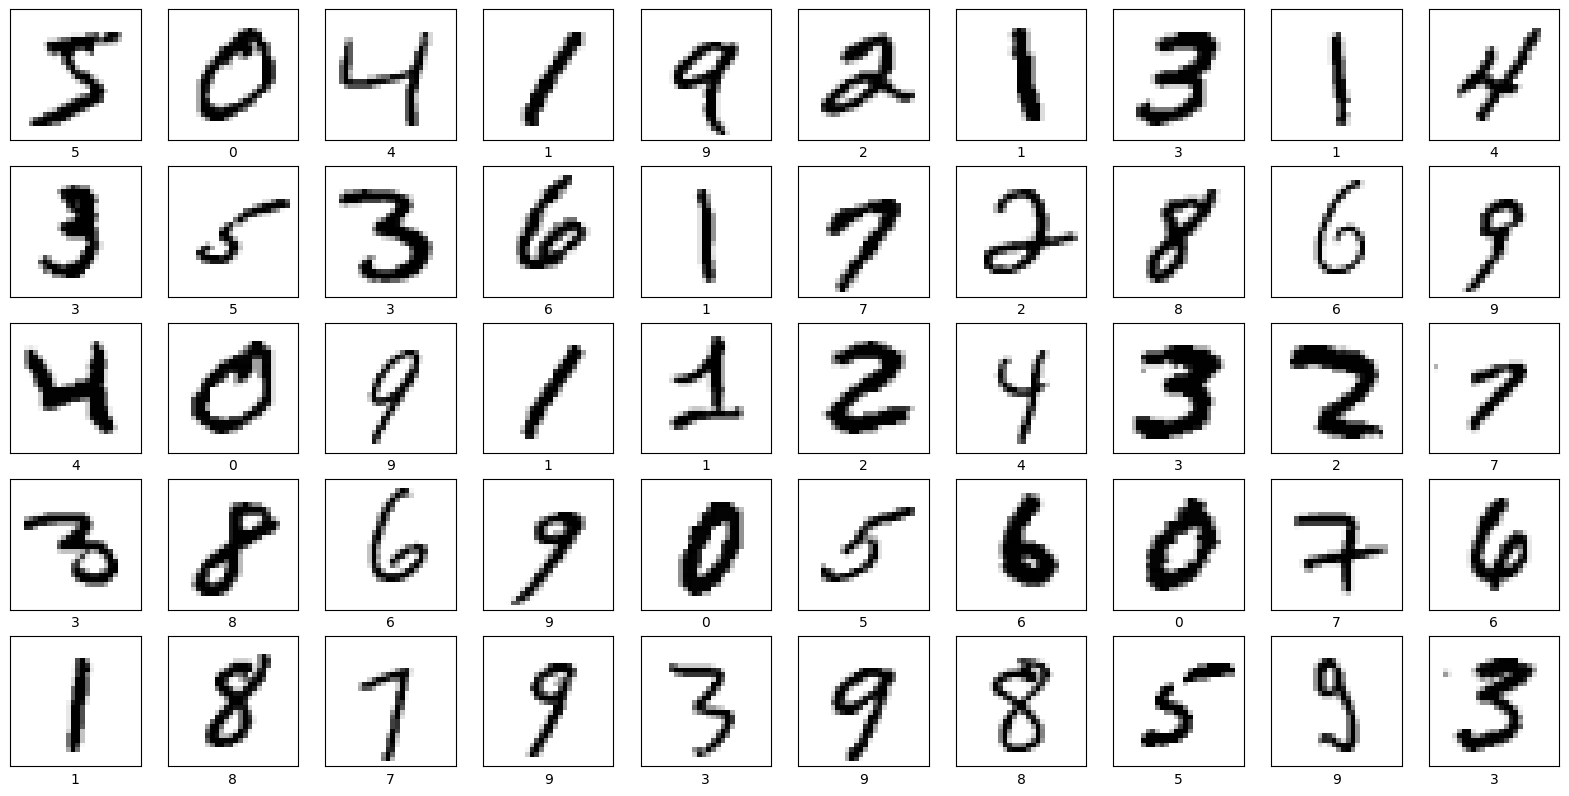


Train dataset size: 60000


In [7]:
# Plot some images from our trainning data and display their labels
plt.figure(figsize=(20,20))
for i in range(50):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()
print("\nTrain dataset size: " + str(len(train_images)))

In [19]:
width, height = test_images.shape[1], test_images.shape[2]

In [32]:
width, height = test_images.shape[1], test_images.shape[2]
model         = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [34]:
# model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])


In [35]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.1485 - accuracy: 0.9548 - val_loss: 0.0446 - val_accuracy: 0.9850
Epoch 2/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0472 - accuracy: 0.9850 - val_loss: 0.0460 - val_accuracy: 0.9856
Epoch 3/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0345 - accuracy: 0.9893 - val_loss: 0.0346 - val_accuracy: 0.9894
Epoch 4/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0271 - accuracy: 0.9917 - val_loss: 0.0249 - val_accuracy: 0.9926
Epoch 5/10
1875/1875 [==============================] - 72s 39ms/step - loss: 0.0217 - accuracy: 0.9929 - val_loss: 0.0257 - val_accuracy: 0.9924
Epoch 6/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0170 - accuracy: 0.9942 - val_loss: 0.0309 - val_accuracy: 0.9904
Epoch 7/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0135 - accuracy: 0.9962 - val_loss: 0.0324 -

In [36]:
train_loss, train_acc = model.evaluate(train_images, train_labels, verbose=2)
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTrain accuracy:', train_acc)
print('\nTest accuracy:', test_acc)

1875/1875 - 19s - loss: 0.0114 - accuracy: 0.9965 - 19s/epoch - 10ms/step
313/313 - 3s - loss: 0.0451 - accuracy: 0.9905 - 3s/epoch - 9ms/step

Train accuracy: 0.9965166449546814

Test accuracy: 0.9904999732971191


In [37]:
predictions = model.predict(test_images)

313/313 [==============================] - 4s 13ms/step


In [25]:
def plot_image(i, predictions, true_labels, imgs):
  predictions_array, true_label, img = predictions[i], true_labels[i], imgs[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)

  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color=color)

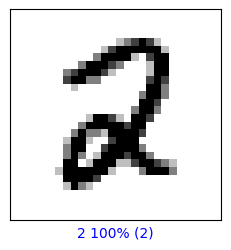

In [46]:
i = 1506
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.show()